# TensorFlow
TensorFlow is a popular open-source library for machine learning and deep learning, developed by Google. It provides a flexible and efficient ecosystem for building and deploying machine learning models. TensorFlow allows you to define and train neural networks, perform numerical computations, and handle large-scale data efficiently. Here's an explanation of TensorFlow with examples:

### 1. Installation:

   Before getting started, you need to install TensorFlow. You can install it using pip:

   ```
   pip install tensorflow
   ```

   in order to use GPU with TensorFlow, install tensorflow-gpu:
   
   ```
   pip install tensorflow-gpu
   ```



### 2. TensorFlow Basics:

   TensorFlow revolves around the concept of tensors, which are multidimensional arrays. The primary building block is the `tf.Tensor` object, representing the data and operations in a computation graph. Let's see a simple example:
   
   In this example, we create two constant tensors `a` and `b`, perform addition using the `tf.add()` function, and execute the computation graph within a TensorFlow session.
   
   

In [10]:

import tensorflow as tf

# Define two constant tensors
a = tf.constant(5)
b = tf.constant(3)

# Perform a computation using the tensors
c = tf.add(a, b)

# Run the computation
result = c.numpy()  # Convert the tensor to a numpy array
print(result)




8



### 3. Building a Neural Network:

   TensorFlow excels in building and training neural networks. Let's look at an example of building a simple feedforward neural network for classification using TensorFlow's high-level API, Keras:


   In this example, we use the Keras API provided by TensorFlow to build a neural network with two dense layers. We load the MNIST dataset, preprocess the data, define the model architecture, compile the model with an optimizer and loss function, train the model on the training data, and evaluate its performance on the test data.




In [11]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2572 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1109 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0764 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0585 - accuracy: 0.9818
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.0804 - accuracy: 0.9763
Test accuracy: 0.9763000011444092


### 4. TensorFlow for GPU Acceleration:

   TensorFlow supports GPU acceleration, which significantly speeds up computations, especially for deep learning models. By utilizing GPUs, you can train models faster and handle larger datasets. Here's an example of enabling GPU acceleration in TensorFlow:

   In this example, we first check if a GPU is available using `tf.test.is_gpu_available()`. If a GPU is available, we specify the GPU device (`'/GPU:0'`) for computations and perform the addition operation using TensorFlow. The computation is then executed within a TensorFlow session, utilizing the GPU for accelerated calculations.


In [12]:
import tensorflow as tf

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print('GPU is available!')
else:
    print('GPU is not available!')

# Perform GPU-accelerated computations
a = tf.constant(5)
b = tf.constant(3)
c = tf.add(a, b)

result = c.numpy()  # Convert the tensor to a numpy array
print(result)


GPU is not available!
8



### 5. TensorFlow for Distributed Computing:

TensorFlow also supports distributed computing, allowing you to train models on multiple machines or devices. This enables you to tackle large-scale machine learning tasks and handle complex models efficiently. Here's a brief example of distributed TensorFlow using the `tf.distribute` module:

In this example, we use the `tf.distribute.MirroredStrategy()` to create a distributed strategy. The model architecture is defined within the strategy scope, ensuring that the model and its variables are distributed across multiple devices or machines. We then compile and train the model using the distributed strategy.




In [15]:
import tensorflow as tf

# Define a distributed strategy
strategy = tf.distribute.MirroredStrategy()

# Define the model architecture
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Create the train_dataset (example using CIFAR-10 dataset)
(train_images, train_labels), _ = tf.keras.datasets.cifar10.load_data()
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(64)

# Train the model
history = model.fit(train_dataset, epochs=5)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/5
782/782 [==============================] - 34s 41ms/step - loss: 3.6048 - accuracy: 0.0970
Epoch 2/5
782/782 [==============================] - 37s 48ms/step - loss: 2.3028 - accuracy: 0.0947
Epoch 3/5
782/782 [==============================] - 42s 54ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 4/5
782/782 [==============================] - 43s 55ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 5/5
782/782 [==============================] - 44s 57ms/step - loss: 2.3028 - accuracy: 0.0971


dict_keys(['loss', 'accuracy'])


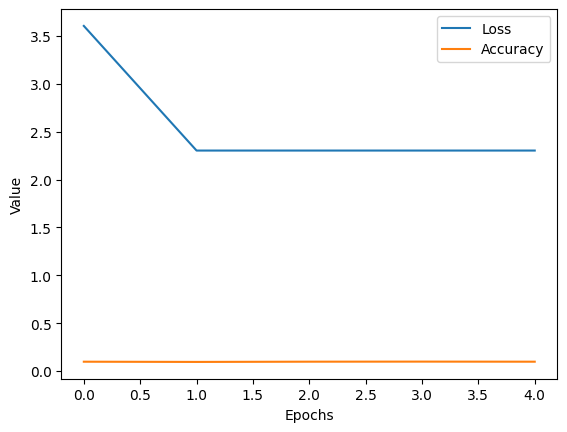

In [16]:
# Access training history
print(history.history.keys())

# Example: Plot training loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy'])
plt.show()

### improve this example:
In this updated code, we have made the following improvements:

- Added batch normalization layers after each convolutional layer to improve convergence speed and stability.
- Added an additional convolutional layer to increase model complexity.
- Added a dropout layer after the dense layer to reduce overfitting.
- Changed the optimizer to Adam with a lower learning rate for better convergence.
- Added data augmentation using random rotations, zooms, and flips to increase dataset variability.
- Increased the number of epochs to 10 for more training iterations.

Feel free to further modify the model architecture, hyperparameters, or apply other techniques based on your specific requirements and dataset.

In [17]:
import tensorflow as tf

# Define a distributed strategy
strategy = tf.distribute.MirroredStrategy()

# Define the model architecture
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Create the train_dataset (example using CIFAR-10 dataset)
(train_images, train_labels), _ = tf.keras.datasets.cifar10.load_data()
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(64)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
])

# Apply data augmentation to the dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# Train the model
history = model.fit(augmented_train_dataset, epochs=10)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/10
782/782 [==============================] - 129s 160ms/step - loss: 1.9315 - accuracy: 0.3117
Epoch 2/10
782/782 [==============================] - 132s 169ms/step - loss: 1.7008 - accuracy: 0.3857
Epoch 3/10
782/782 [==============================] - 131s 167ms/step - loss: 1.6100 - accuracy: 0.4220
Epoch 4/10
782/782 [==============================] - 116s 148ms/step - loss: 1.5443 - accuracy: 0.4448
Epoch 5/10
782/782 [==============================] - 116s 149ms/step - loss: 1.4867 - accuracy: 0.4700
Epoch 6/10
782/782 [==============================] - 120s 154ms/step - loss: 1.4423 - accuracy: 0.4857
Epoch 7/10
782/782 [==============================] - 139s 177ms/step - loss: 1.4059 - accuracy: 0.5023
Epoch 8/10
782/782 [==============================] - 139s 177ms/step - loss: 1.3722 - accuracy: 0.5135
Epoch 9/10
782/782 [==============================] - 149s 191ms/s

dict_keys(['loss', 'accuracy'])


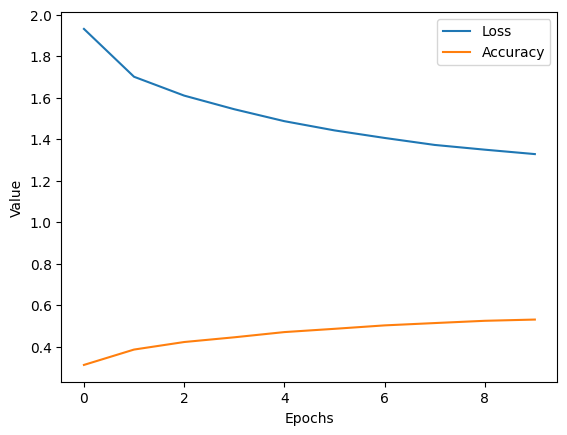

In [18]:
# Access training history
print(history.history.keys())

# Example: Plot training loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [ ]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

# Apply data augmentation and train the model
history = model.fit(data_augmentation(x_train), y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))


In [ ]:
# Access training history
print(history.history.keys())

# Example: Plot training loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy'])
plt.show()


These examples provide a glimpse into the capabilities of TensorFlow. The library offers much more, including support for custom models, advanced optimization techniques, model deployment, and integration with other frameworks and tools. TensorFlow's extensive documentation and resources can guide you through further exploration and development with TensorFlow.